# <center> Лабораторная работа 1 "Линейная регрессия"
### <center> Воложанин Владислав Олегович ИВТ 1.3 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)
display(data.isnull().sum())

data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1) 
data = pd.get_dummies(data)
data.head()

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [4]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

### <center> Задача №1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


### <center> Задача №2

In [6]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [7]:
linear_reg_model = linear_model.LinearRegression()
linear_reg_model

LinearRegression()

In [8]:
linear_reg_model.fit(X_train, y_train)

intercept = linear_reg_model.intercept_
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

print("Значение свободного члена (intercept) обученной модели:", round(intercept, 2))

Значение свободного члена (intercept) обученной модели: -12390.8


In [9]:
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Test MAPE: 46.888


### <center> Задача №3

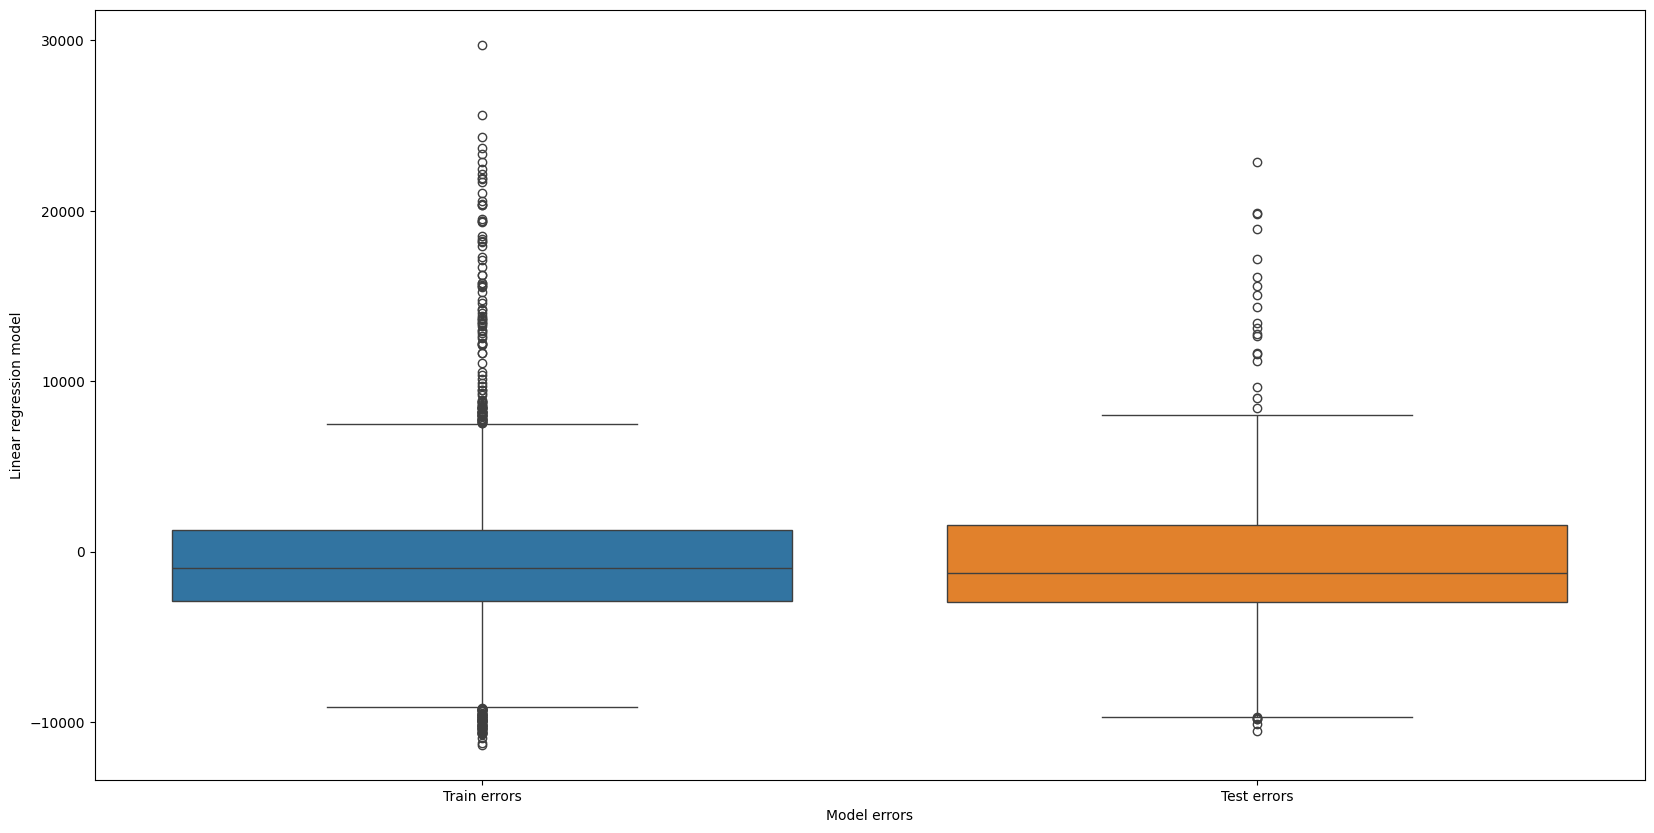

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
y_train_errors = y_train - y_train_pred
y_test_errors = y_test - y_test_pred
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors})

sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Linear regression model');

### <center> Задача №4

In [11]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


### <center> Задача №5

In [12]:
y_train_log = np.log(y_train)
ridge_linear_reg_poly = linear_model.Ridge()
ridge_linear_reg_poly.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(ridge_linear_reg_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_linear_reg_poly.predict(X_test_scaled_poly))
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.816
Train MAE: 2684.509
Train MAPE: 18.243


Test R^2: 0.857
Test MAE: 2424.021
Test MAPE: 17.912


### <center> Задача №6

In [13]:
print("Коэффициенты:")
coefficients = ridge_linear_reg_poly.coef_
for i, coef in enumerate(coefficients):
    print(f"Коэффициент x^{i}: {coef}")

Коэффициенты:
Коэффициент x^0: 1.6106818022526996
Коэффициент x^1: -0.12546875644160901
Коэффициент x^2: 0.23815977367970853
Коэффициент x^3: 0.7995750337394999
Коэффициент x^4: 0.711720794561989
Коэффициент x^5: 0.04700831063214945
Коэффициент x^6: 0.03243169609112555
Коэффициент x^7: -0.01710076711066014
Коэффициент x^8: -0.06233923961271458
Коэффициент x^9: -0.17903953561636604
Коэффициент x^10: 0.22817373738251648
Коэффициент x^11: 0.008252553775557185
Коэффициент x^12: -0.7169733247435343
Коэффициент x^13: -1.370540788461999
Коэффициент x^14: 0.20746182949998562
Коэффициент x^15: 0.3143326725004897
Коэффициент x^16: 0.5020147973696402
Коэффициент x^17: 0.5868725028825599
Коэффициент x^18: -0.12546875644160851
Коэффициент x^19: 0.14359208582048877
Коэффициент x^20: 0.052490814288720516
Коэффициент x^21: 0.12213180470223978
Коэффициент x^22: -0.06511464850600977
Коэффициент x^23: 0.008665285742955003
Коэффициент x^24: -0.013558334613884209
Коэффициент x^25: -0.05546105906470127
Коэф

### <center> Задача №7

In [14]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(lasso_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lasso_lr_poly.predict(X_test_scaled_poly))
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
print("Значение свободного члена (intercept) обученной модели:", round(intercept, 2))

Train R^2: -0.126
Train MAE: 8293.602
Train MAPE: 96.957


Test R^2: -0.098
Test MAE: 8603.138
Test MAPE: 107.491
Значение свободного члена (intercept) обученной модели: -12390.8
